In [95]:
%pip install matplotlib deap 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [96]:
#Required Libraries
import random
import numpy as np
import math
import matplotlib.pyplot as plt #type: ignore
from deap import base, creator, tools, algorithms #type: ignore

In [97]:
# Pre Requisite Values
num_locations=20

locations=[(random.randint(-100, 100), random.randint(-100, 100)) for _ in range(num_locations)]

depot=(0,0)

num_vehicles=4

# print(num_locations)
# print(locations)

In [98]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)

toolbox.register("individual",tools.initIterate,creator.Individual,toolbox.indices)  #finish defining how to build an individual)
toolbox.register("population",tools.initRepeat,list,toolbox.individual) #finish defining how to build an population)

# print(toolbox.population(100))

/home/sparsh/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/sparsh/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [99]:
# Fitness Function
def evalVRP(individual):
    x,y=depot
    totalDistance=0
    distances=[]
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        totalDistance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return totalDistance, balance_penalty

In [100]:
#Genetic Operators
toolbox.register("evaluate", evalVRP)
toolbox.register("mate",tools.cxPartialyMatched) # Choose and configure a crossover method)
toolbox.register("mutate",tools.mutShuffleIndexes,indpb=0.05) # Choose and configure a mutation method)
toolbox.register("select",tools.selTournament,tournsize=3)

In [101]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [102]:
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof


gen	nevals	avg    	min    
0  	300   	1250.05	15.1112
1  	213   	1205.9 	13.7787
2  	243   	1191.5 	6.67487
3  	232   	1185.28	6.67487
4  	233   	1174.72	6.67487
5  	218   	1152.44	9.93292
6  	213   	1143.58	14.134 
7  	233   	1150.48	11.1997
8  	219   	1131.15	10.6208
9  	209   	1114.93	12.9039
10 	224   	1104.5 	9.088  
11 	230   	1119.34	6.03848
12 	230   	1106.87	6.31096
13 	217   	1077.31	13.7518
14 	231   	1077.17	13.7518
15 	250   	1073.87	13.8452
16 	238   	1053.46	20.4967
17 	236   	1035.68	20.5933
18 	225   	1019.01	20.0655
19 	225   	1003.83	11.2231
20 	209   	972.928	9.96831
21 	232   	982.937	11.7304
22 	237   	952.265	13.3338
23 	217   	951.703	23.315 
24 	227   	946.543	14.4961
25 	246   	937.146	18.2636
26 	233   	873.408	14.2871
27 	219   	842.362	14.746 
28 	229   	825.021	16.6887
29 	223   	816.862	22.5215
30 	238   	803.722	12.6503
31 	225   	792.787	15.5153
32 	221   	789.884	24.4892
33 	243   	783.138	24.1232
34 	232   	777.011	34.9993
35 	244   	776.534	30.3881
3

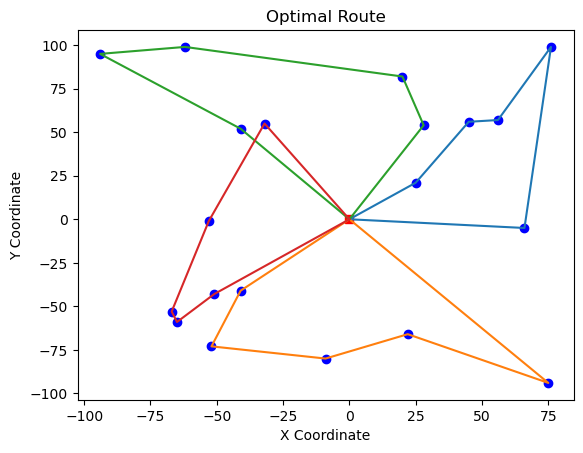

In [103]:
if __name__ == "__main__":
    main()